In [ ]:
Q3. Build a spam filter using SVM. A spam filter classify an email to be Ham or Spam, 
using the content of an email as features. 

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rajesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Model Accuracy: 0.9766816143497757


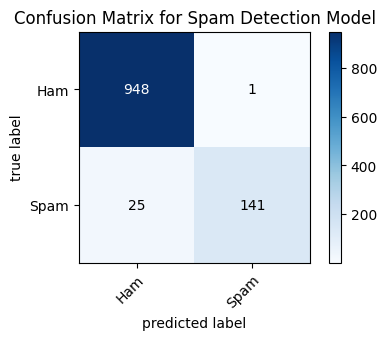

In [2]:


# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')

# Data preprocessing
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])  # Drop unused columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})  # Rename columns
encoder = LabelEncoder()  # Encode labels (ham=0, spam=1)
df['label'] = encoder.fit_transform(df['label'])

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['text'] = df['text'].apply(clean_text)  # Apply cleaning function

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define and train the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, colorbar=True, class_names=['Ham', 'Spam'], figsize=(5, 3))
plt.title("Confusion Matrix for Spam Detection Model")
plt.show()

# Function to predict new emails
def predict_email(email_text):
    cleaned_text = clean_text(email_text)  # Clean the input
    vectorized_text = tfidf.transform([cleaned_text]).toarray()  # Vectorize using the existing TF-IDF model
    prediction = model.predict(vectorized_text)  # Predict using the trained model
    label = encoder.inverse_transform(prediction)  # Convert prediction to original label
    return label[0]



In [3]:
# Test with sample inputs
sample_email1 = "Congratulations! You've won a free ticket to the Bahamas. Click here to claim now!"
sample_email2 = "Hey, let's catch up for coffee tomorrow. Let me know what time works for you."

print(f"Prediction for sample 1: {predict_email(sample_email1)}")  # Expected output: spam
print(f"Prediction for sample 2: {predict_email(sample_email2)}")  # Expected output: ham

Prediction for sample 1: spam
Prediction for sample 2: ham
